In [2]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [4]:
import torch
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())

PyTorch version: 2.6.0
CUDA available: False


In [5]:
from transformers import AutoTokenizer, AutoModelForCausalLM

# use GPT-2
model_id = "openai-community/gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id)

# Prompt Example

prompt = "Write a birthday message to your best friend called Tom."
inputs = tokenizer(prompt, return_tensors="pt")
# Generate
outputs = model.generate(
    **inputs,
    max_new_tokens=80,
    do_sample=True,
    temperature=0.8,
    top_k=50,
    top_p=0.95,
    eos_token_id=tokenizer.eos_token_id,
    pad_token_id=tokenizer.eos_token_id
)

# Print Output
print("🎁 GPT-2 Output:")
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

🎁 GPT-2 Output:
Write a birthday message to your best friend called Tom. Or just ask for his favorite photo. Or just tell him the name of the person you're dating. Or just tell him a funny story.

I'm not saying that any of these are the best things you can do for your career, but they're a pretty good starting point. If you want to try some new things, here are the things you should try. I also have a


In [73]:
# Define Hierarchical Prompts for Different Categories

# Define hierarchical prompts for each category as a dictionary.
# Each category is a list of prompts with increasing specificity.
hierarchical_prompts = {
    "Birthday": [
        "Write a short happy birthday message.",
        "Write a warm birthday message to your best friend Tom.",
        "Write a heartfelt birthday message to your best friend Tom, thanking him for always being there to support you during tough times."
    ],
    "Anniversary": [
        "Write a happy anniversary message.",
        "Write a loving anniversary message to your wife.",
        "Write a romantic anniversary message to your wife, recalling the beautiful moments you’ve shared together over the years."
    ],
    "Encouragement": [
        "Write an encouraging message.",
        "Write an encouraging message to your daughter before her final exams.",
        "Write a supportive and motivating message to your daughter, reminding her of her hard work and telling her how proud you are of her efforts in preparing for her finals."
    ],
    "Thank You": [
        "Write a thank you message",
        "Write a thank you message to your mentor for her guidance.",
        "Write a sincere thank you message to your mentor, expressing gratitude for her thoughtful advice and emotional support during your job search."
    ]
}

In [82]:
# Import Libraries and Load the Model
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

seed = 30
torch.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)

In [84]:
# Load the Flan-T5-base model and tokenizer
model_name = "google/flan-t5-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

print("Model and tokenizer loaded successfully!")

Model and tokenizer loaded successfully!


In [121]:
# Define a function to generate messages from a given prompt
def generate_message(prompt, max_tokens=80, temperature=0.6, top_k=30, top_p=0.9):
    """
    Generate a blessing message using the Flan-T5-base model.
    """
    inputs = tokenizer(prompt, return_tensors="pt")
    outputs = model.generate(
        **inputs,
        max_new_tokens=80,
        min_new_tokens=30,
        do_sample=True,
        num_beams=1,
        temperature=temperature,
        top_k=top_k,
        top_p=top_p,
        repetition_penalty=1.3,
        no_repeat_ngram_size=3,
        eos_token_id=tokenizer.eos_token_id,
        pad_token_id=tokenizer.eos_token_id
    )
    # Decode the output and return the generated text
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

In [145]:
# Generate Messages for All Hierarchical Prompts
results = []  # List to store results

print("=== Generating Blessing Messages ===\n")
for category, prompts in hierarchical_prompts.items():
    for level, prompt in enumerate(prompts, start=1):
        # Create a full prompt
        full_prompt = prompt.capitalize()
        generated = generate_message(full_prompt)
        results.append({
            "Category": category,
            "Level": level,
            "Prompt": full_prompt,
            "Generated Message": generated
        })
        print(f"Category: {category}, Level: {level}")
        print("Prompt:", full_prompt)
        print("Output:", generated)
        print("-" * 60)

=== Generating Blessing Messages ===

Category: Birthday, Level: 1
Prompt: Write a short happy birthday message.
Output: Happy birthday. Thank you very much. You are welcome. I know that. Do you remember? And do you like it? Then, you're a perfect time for a holiday.
------------------------------------------------------------
Category: Birthday, Level: 2
Prompt: Write a warm birthday message to your best friend tom.
Output: tom! You're welcome! I can see you and your best friend! I love that. I can understand it. But, you're not the only one who has a crush on you. And your heart is always there. And you have a great time. That makes you feel like you've been growing up. That doesn't stop people from thinking about each
------------------------------------------------------------
Category: Birthday, Level: 3
Prompt: Write a heartfelt birthday message to your best friend tom, thanking him for always being there to support you during tough times.
Output: tommy, you are a great person. I

In [216]:
# Convert results to a DataFrame for evaluation and visualization
df_results = pd.DataFrame(results)
print("\n=== All Generated Results ===")
print(df_results)


=== All Generated Results ===
         Category  Level                                             Prompt  \
0        Birthday      1              Write a short happy birthday message.   
1        Birthday      2  Write a warm birthday message to your best fri...   
2        Birthday      3  Write a heartfelt birthday message to your bes...   
3     Anniversary      1                 Write a happy anniversary message.   
4     Anniversary      2   Write a loving anniversary message to your wife.   
5     Anniversary      3  Write a romantic anniversary message to your w...   
6   Encouragement      1                      Write an encouraging message.   
7   Encouragement      2  Write an encouraging message to your daughter ...   
8   Encouragement      3  Write a supportive and motivating message to y...   
9       Thank You      1                          Write a thank you message   
10      Thank You      2  Write a thank you message to your mentor for h...   
11      Thank You    

In [214]:
# Assume df_results contains generated prompts and outputs
# Add blank columns for human evaluation dimensions
for dim in ["Fluency", "Relevance",  "Logic"]:
    df_results[dim] = ""
df_results["Average Score"] = ""
# Save the template for manual evaluation
df_results.to_csv("evaluation_template.csv", index=False)
print("✅ Evaluation template has been saved as 'evaluation_template.csv'.")

✅ Evaluation template has been saved as 'evaluation_template.csv'.


In [30]:
import pandas as pd
# Load the manually filled CSV
df_scored = pd.read_csv("evaluation_template.csv")

# Convert scoring columns to float (in case they were entered as strings)
score_columns = ["Fluency", "Relevance", "Logic"]
df_scored[score_columns] = df_scored[score_columns].astype(float)

# Calculate average score for each generated message
df_scored["Average Score"] = df_scored[score_columns].mean(axis=1)

# Print summarized results
print("✅ Evaluation results loaded. Here's a preview:")
print(df_scored[["Category", "Level", "Prompt", "Average Score"]])

✅ Evaluation results loaded. Here's a preview:
         Category  Level                                             Prompt  \
0        Birthday      1              Write a short happy birthday message.   
1        Birthday      2  Write a warm birthday message to your best fri...   
2        Birthday      3  Write a heartfelt birthday message to your bes...   
3     Anniversary      1                 Write a happy anniversary message.   
4     Anniversary      2   Write a loving anniversary message to your wife.   
5     Anniversary      3  Write a romantic anniversary message to your w...   
6   Encouragement      1                      Write an encouraging message.   
7   Encouragement      2  Write an encouraging message to your daughter ...   
8   Encouragement      3  Write a supportive and motivating message to y...   
9       Thank You      1                          Write a thank you message   
10      Thank You      2  Write a thank you message to your mentor for h...   
11   

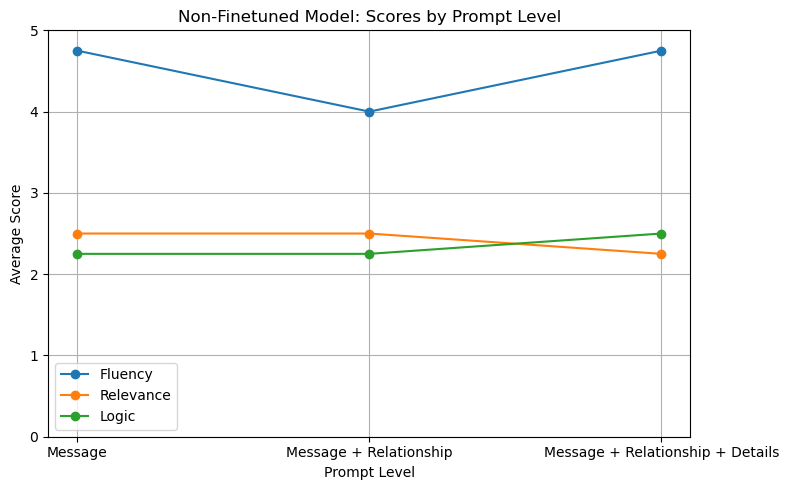

In [44]:
import matplotlib.pyplot as plt

# Load scored results for the base model (non-finetuned)
df_base = pd.read_csv("evaluation_template.csv")

# Convert score columns to float
score_cols = ["Fluency", "Relevance", "Logic"]
df_base[score_cols] = df_base[score_cols].astype(float)

# Group by prompt level and calculate mean scores
avg_by_level = df_base.groupby("Level")[score_cols].mean()

# Plot line chart showing all three evaluation dimensions
plt.figure(figsize=(8, 5))
for col in score_cols:
    plt.plot(avg_by_level.index, avg_by_level[col], marker='o', label=col)

plt.title("Non-Finetuned Model: Scores by Prompt Level")
plt.xlabel("Prompt Level")
plt.ylabel("Average Score")
plt.xticks(ticks=[1, 2, 3], labels=["Message", "Message + Relationship", "Message + Relationship + Details"])
plt.ylim(0, 5)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

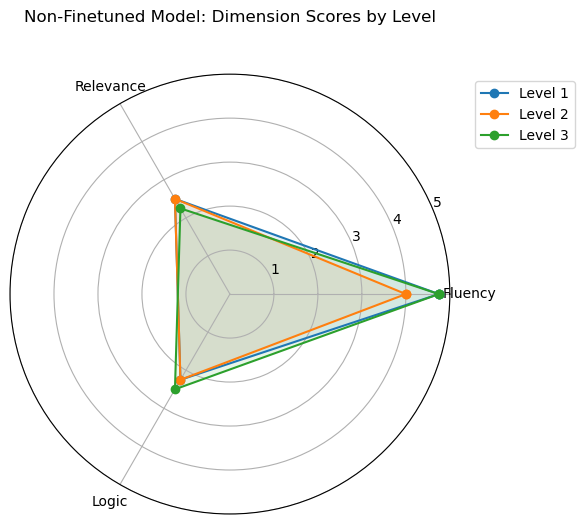

In [34]:
import numpy as np
radar_data = avg_by_level[["Fluency", "Relevance", "Logic"]]


labels = radar_data.columns.tolist()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1] 


fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for level in radar_data.index:
    values = radar_data.loc[level].tolist()
    values += values[:1] 
    ax.plot(angles, values, marker='o', label=f"Level {level}")
    ax.fill(angles, values, alpha=0.1)

ax.set_title("Non-Finetuned Model: Dimension Scores by Level", y=1.1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_ylim(0, 5)
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.show()

In [101]:
# =====================================
# STEP 0: Install necessary packages
# =====================================
!pip install -q transformers datasets peft accelerate bitsandbytes

# =====================================
# STEP 1: Load and preprocess dataset
# =====================================
from datasets import Dataset
from transformers import (
    AutoTokenizer, AutoModelForSeq2SeqLM,
    Seq2SeqTrainingArguments, Seq2SeqTrainer,
    DataCollatorForSeq2Seq, EarlyStoppingCallback
)
from peft import LoraConfig, TaskType, get_peft_model, PeftModel
from datasets import DatasetDict

# Load and format dataset
df = pd.read_csv("blessing_dataset_60_distinct_prompt.csv", encoding="ISO-8859-1")
df = df.rename(columns={"Prompt": "instruction", "Target": "output"})
dataset = Dataset.from_pandas(df[["instruction", "output"]])
dataset = dataset.train_test_split(test_size=0.2, seed=42)

train_dataset = dataset["train"]
eval_dataset = dataset["test"]
# ✅ Filter out samples with invalid outputs
def has_valid_output(example):
    return example["output"] is not None and example["output"].strip() != ""

train_dataset = train_dataset.filter(has_valid_output)
eval_dataset = eval_dataset.filter(has_valid_output)
# =====================================
# STEP 2: Define base model and tokenizer
# =====================================
base_model_name = "google/flan-t5-small"
tokenizer = AutoTokenizer.from_pretrained(base_model_name)
base_model = AutoModelForSeq2SeqLM.from_pretrained(base_model_name)

# =====================================
# STEP 3: Apply LoRA config for fine-tuning
# =====================================
peft_config = LoraConfig(
    task_type="SEQ_2_SEQ_LM",
    inference_mode=False,
    r=16,
    lora_alpha=32,
    lora_dropout=0.1,
    target_modules=["q", "v"]
)
model = get_peft_model(base_model, peft_config)

# =====================================
# STEP 4: Tokenization and preprocessing
# =====================================
def preprocess(example):
    inputs = tokenizer(example["instruction"], padding="max_length", truncation=True, max_length=128)
    targets = tokenizer(example["output"], padding="max_length", truncation=True, max_length=128)
    inputs["labels"] = targets["input_ids"]
    return inputs

# =====================================
# STEP 5: Training configuration
# =====================================
training_args = Seq2SeqTrainingArguments(
    output_dir="./flan-t5-blessing-lora",
    per_device_train_batch_size=4,
    learning_rate=1e-4,
    num_train_epochs=40,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=1,
    predict_with_generate=True,
    logging_dir="./logs",
    logging_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    fp16=False,
    report_to="none"
)

# =====================================
# STEP 6: Train the model with early stopping
# =====================================
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset.map(preprocess, remove_columns=train_dataset.column_names),
    eval_dataset=eval_dataset.map(preprocess, remove_columns=eval_dataset.column_names),
    tokenizer=tokenizer,
    data_collator=DataCollatorForSeq2Seq(tokenizer, model=model),
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

trainer.train()

# Save model & tokenizer
model.save_pretrained("flan-t5-blessing-lora")
tokenizer.save_pretrained("flan-t5-blessing-lora")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Filter:   0%|          | 0/67 [00:00<?, ? examples/s]

Filter:   0%|          | 0/17 [00:00<?, ? examples/s]

/opt/anaconda3/lib/python3.12/site-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Map:   0%|          | 0/66 [00:00<?, ? examples/s]

Map:   0%|          | 0/17 [00:00<?, ? examples/s]

/var/folders/92/_xrntzw54_b2886ht4msx2w00000gn/T/ipykernel_26252/3523585044.py:85: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(
No label_names provided for model class `PeftModelForSeq2SeqLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Epoch,Training Loss,Validation Loss
1,31.526100,35.547508
2,30.110900,33.935818
3,28.662100,31.628433
4,26.730500,28.876554
5,24.309100,25.829821
6,21.643300,22.611223
7,19.280100,18.821280
8,16.493600,14.557248
9,13.581900,9.779165
10,10.513500,6.870235


('flan-t5-blessing-lora/tokenizer_config.json',
 'flan-t5-blessing-lora/special_tokens_map.json',
 'flan-t5-blessing-lora/tokenizer.json')

In [125]:
# =====================================
# STEP 7: Load fine-tuned model for inference
# =====================================
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from peft import PeftModel

torch.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)

model_path = "./flan-t5-blessing-lora"
base_model_name = "google/flan-t5-small"

tokenizer = AutoTokenizer.from_pretrained(base_model_name)
base_model = AutoModelForSeq2SeqLM.from_pretrained(base_model_name)
model = PeftModel.from_pretrained(base_model, model_path)

# =====================================
# STEP 8: Define generation function
# =====================================

def generate_message(prompt, max_tokens=80, temperature=0.6, top_k=30, top_p=0.9):
    inputs = tokenizer(prompt, return_tensors="pt")
    outputs = model.generate(
        **inputs,
        max_new_tokens=max_tokens,
        min_new_tokens=30,
        do_sample=True,
        num_beams=1,
        temperature=temperature,
        repetition_penalty=1.3,    
        no_repeat_ngram_size=3,
        top_k=top_k,
        top_p=top_p,
        eos_token_id=tokenizer.eos_token_id,
        pad_token_id=tokenizer.eos_token_id
    )
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

In [198]:
results_finetuned = []

print("=== Generating Blessing Messages (Finetuned) ===\n")
for category, prompts in hierarchical_prompts.items():
    for level, prompt in enumerate(prompts, start=1):
        full_prompt = prompt.capitalize()
        generated = generate_message(full_prompt)
        results_finetuned.append({
            "Category": category,
            "Level": level,
            "Prompt": full_prompt,
            "Generated Message": generated
        })
        print(f"Category: {category}, Level: {level}")
        print("Prompt:", full_prompt)
        print("Output:", generated)
        print("-" * 60)

# Convert to DataFrame and add blank columns
df_results_finetuned = pd.DataFrame(results_finetuned)

# Save to CSV
df_results_finetuned.to_csv("evaluation_template_finetuned.csv", index=False)
print("✅ Finetuned evaluation template saved as 'evaluation_template_finetuned.csv'.")

=== Generating Blessing Messages (Finetuned) ===

Category: Birthday, Level: 1
Prompt: Write a short happy birthday message.
Output: Birthday is a very special day! This is yours. It's sooo good. I need it. But it's not the same as a birthday. And you can always have it.
------------------------------------------------------------
Category: Birthday, Level: 2
Prompt: Write a warm birthday message to your best friend tom.
Output: Happy birthday! I'm sooo excited! It's a great day. But you are in love with your best friend! You can make it feel like royalty.
------------------------------------------------------------
Category: Birthday, Level: 3
Prompt: Write a heartfelt birthday message to your best friend tom, thanking him for always being there to support you during tough times.
Output: Thank you for always being there. Have a great day! I'm so glad you had the same smile, and your kindness. Let me help you.
------------------------------------------------------------
Category: Anniv

In [204]:
# Assume df_results_finetuned contains generated prompts and outputs from finetuned model
# Add blank columns for evaluation
for dim in ["Fluency", "Relevance", "Logic"]:
    df_results_finetuned[dim] = ""
# Add empty column for Average Score (will be computed later)
df_results_finetuned["Average Score"] = ""
# Save template
df_results_finetuned.to_csv("evaluation_template_finetuned.csv", index=False)
print("✅ Evaluation template saved as 'evaluation_template_finetuned.csv'.")

✅ Evaluation template saved as 'evaluation_template_finetuned.csv'.


In [19]:
# Load the manually scored version
df_finetuned_scored = pd.read_csv("evaluation_template_finetuned.csv")

# Convert scoring columns to float
score_cols = ["Fluency", "Relevance", "Logic"]
df_finetuned_scored[score_cols] = df_finetuned_scored[score_cols].astype(float)

# Calculate average score per output
df_finetuned_scored["Average Score"] = df_finetuned_scored[score_cols].mean(axis=1)

print(df_finetuned_scored.columns.tolist())
# Display a preview
print("✅ Finetuned evaluation results loaded:")
print(df_finetuned_scored[["Category", "Level", "Prompt", "Average Score"]])


['Category', 'Level', 'Prompt', 'Generated Message', 'Fluency', 'Relevance', 'Logic', 'Average Score']
✅ Finetuned evaluation results loaded:
         Category  Level                                             Prompt  \
0        Birthday      1              Write a short happy birthday message.   
1        Birthday      2  Write a warm birthday message to your best fri...   
2        Birthday      3  Write a heartfelt birthday message to your bes...   
3     Anniversary      1                 Write a happy anniversary message.   
4     Anniversary      2   Write a loving anniversary message to your wife.   
5     Anniversary      3  Write a romantic anniversary message to your w...   
6   Encouragement      1                      Write an encouraging message.   
7   Encouragement      2  Write an encouraging message to your daughter ...   
8   Encouragement      3  Write a supportive and motivating message to y...   
9       Thank You      1                          Write a thank you 

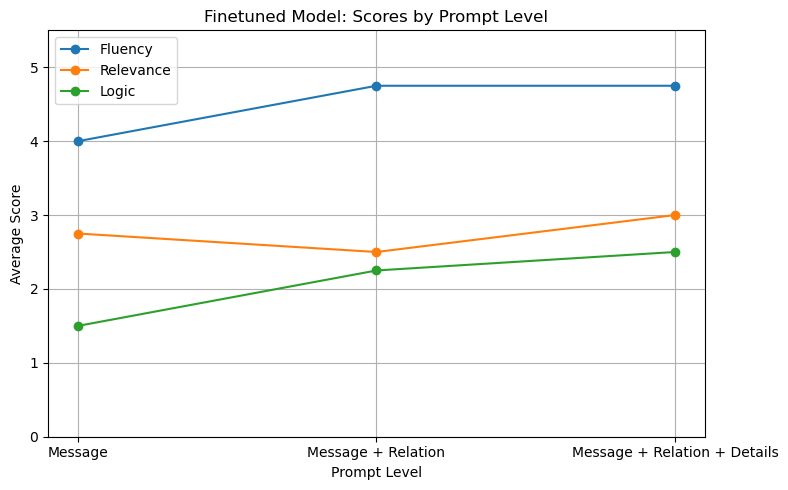

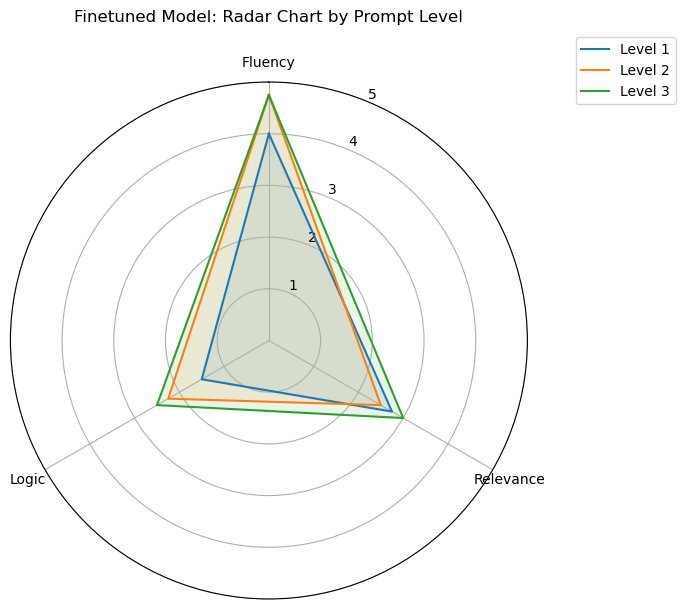

In [36]:
# Load scored finetuned results
df_finetuned = pd.read_csv("evaluation_template_finetuned.csv")

# Convert scoring columns to float
score_cols = ["Fluency", "Relevance", "Logic"]
df_finetuned[score_cols] = df_finetuned[score_cols].astype(float)

# Group by level
avg_by_level = df_finetuned.groupby("Level")[score_cols].mean()

# =======================
# Line Chart by Prompt Level
# =======================
plt.figure(figsize=(8, 5))
for col in score_cols:
    plt.plot(avg_by_level.index, avg_by_level[col], marker='o', label=col)

plt.title("Finetuned Model: Scores by Prompt Level")
plt.xlabel("Prompt Level")
plt.ylabel("Average Score")
plt.xticks([1, 2, 3], labels=["Message", "Message + Relation", "Message + Relation + Details"])
plt.ylim(0, 5.5)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("non_finetuned_linechart.png", dpi=300, bbox_inches="tight")
plt.show()

# =======================
# Radar Chart by Prompt Level
# =======================
labels = score_cols
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # close the loop

fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

for level in sorted(df_finetuned["Level"].unique()):
    scores = avg_by_level.loc[level].tolist()
    scores += scores[:1]
    ax.plot(angles, scores, label=f"Level {level}")
    ax.fill(angles, scores, alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_ylim(0, 5)
ax.set_title("Finetuned Model: Radar Chart by Prompt Level", y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.savefig("non_finetuned_radarchart.png", dpi=300, bbox_inches="tight")
plt.show()

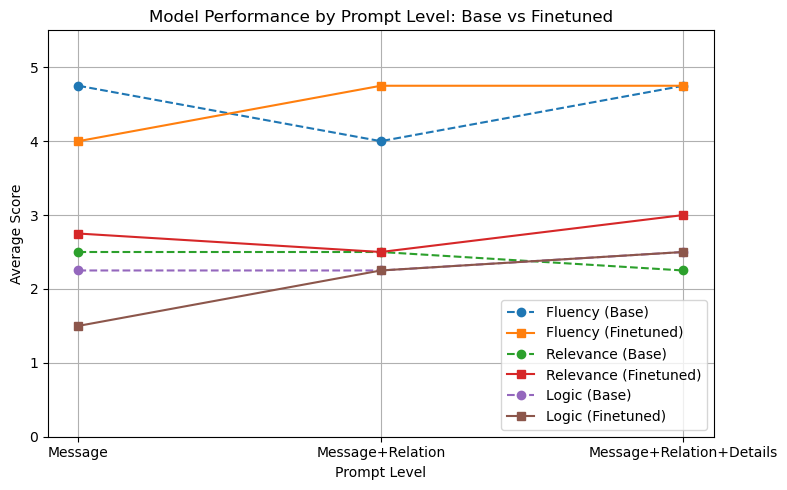

In [38]:
# Load both scored CSVs
df_base = pd.read_csv("evaluation_template.csv")
df_finetuned = pd.read_csv("evaluation_template_finetuned.csv")

# Convert to float
score_cols = ["Fluency", "Relevance", "Logic"]
df_base[score_cols] = df_base[score_cols].astype(float)
df_finetuned[score_cols] = df_finetuned[score_cols].astype(float)

# Compute average scores by Level
base_avg = df_base.groupby("Level")[score_cols].mean()
finetuned_avg = df_finetuned.groupby("Level")[score_cols].mean()

# Plot line chart
plt.figure(figsize=(8, 5))
for col in score_cols:
    plt.plot(base_avg.index, base_avg[col], marker='o', label=f"{col} (Base)", linestyle="--")
    plt.plot(finetuned_avg.index, finetuned_avg[col], marker='s', label=f"{col} (Finetuned)")

plt.title("Model Performance by Prompt Level: Base vs Finetuned")
plt.xlabel("Prompt Level")
plt.ylabel("Average Score")
plt.xticks([1, 2, 3], ["Message", "Message+Relation", "Message+Relation+Details"])
plt.ylim(0, 5.5)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("base_vs_finetuned_linechart.png", dpi=300, bbox_inches="tight")
plt.show()

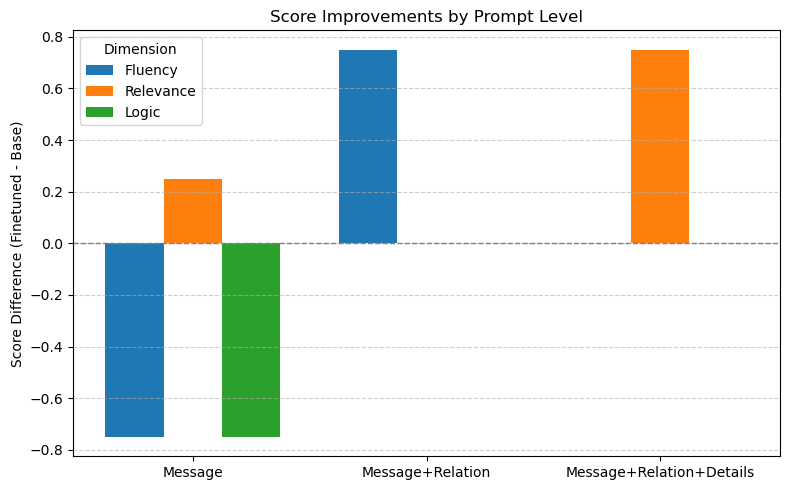

In [40]:
# Load scored CSVs for base and finetuned models
df_base = pd.read_csv("evaluation_template.csv")
df_finetuned = pd.read_csv("evaluation_template_finetuned.csv")

# Define the scoring dimensions
score_cols = ["Fluency", "Relevance", "Logic"]

# Convert columns to float type
df_base[score_cols] = df_base[score_cols].astype(float)
df_finetuned[score_cols] = df_finetuned[score_cols].astype(float)

# Compute average score by prompt level
base_avg = df_base.groupby("Level")[score_cols].mean()
finetuned_avg = df_finetuned.groupby("Level")[score_cols].mean()

# Compute difference (Finetuned - Base)
score_diff = finetuned_avg - base_avg

# Prepare bar plot positions
x = np.arange(len(score_diff.index))  # Level 1, 2, 3
width = 0.25  # Width of each bar

# Create the bar chart
plt.figure(figsize=(8, 5))
for i, col in enumerate(score_cols):
    plt.bar(x + i * width - width, score_diff[col], width, label=col)

# Set axis labels and titles
plt.xticks(ticks=x, labels=["Message", "Message+Relation", "Message+Relation+Details"])
plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.ylabel("Score Difference (Finetuned - Base)")
plt.title("Score Improvements by Prompt Level")
plt.legend(title="Dimension")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("base_vs_finetuned_barchart.png", dpi=300, bbox_inches="tight")
plt.show()

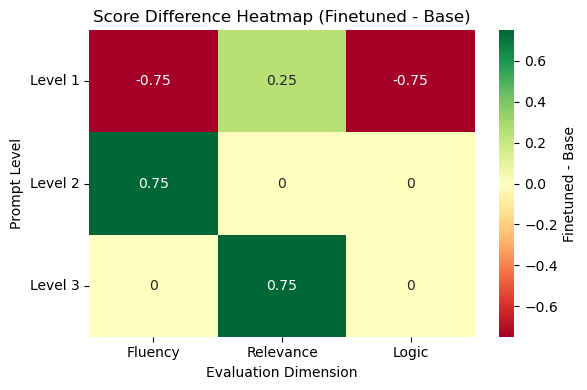

In [42]:
import seaborn as sns

# Compute score difference
score_diff = finetuned_avg - base_avg

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(score_diff, annot=True, cmap="RdYlGn", center=0, cbar_kws={"label": "Finetuned - Base"})
plt.title("Score Difference Heatmap (Finetuned - Base)")
plt.ylabel("Prompt Level")
plt.xlabel("Evaluation Dimension")
plt.yticks(ticks=[0.5,1.5,2.5], labels=["Level 1", "Level 2", "Level 3"], rotation=0)
plt.tight_layout()
plt.savefig("base_vs_finetuned_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()